In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import pymysql
import numpy as np
from geoip import geolite2
from collections import Counter
import seaborn as sns
import random
import matplotlib.pyplot as plt
import math

/Users/sadeghia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
db = pymysql.connect(host='localhost', user='root',passwd='leproject',db='ka_lite_central')

In [4]:
%matplotlib inline

In [5]:
cur = db.cursor()

In [6]:
cur.execute("Select client_device_id, MIN(timestamp) FROM securesync_country group by client_device_id;")

9059

In [7]:
cur.execute("select DISTINCT a.client_device_id, a.countryname FROM securesync_country as a join \
(Select client_device_id, MIN(timestamp) as mintime FROM securesync_country group by client_device_id) as b \
on a.client_device_id=b.client_device_id WHERE a.timestamp=b.mintime;")

9059

In [8]:
first_country = cur.fetchall()

In [9]:
cur.execute("select DISTINCT a.client_device_id, a.countryname FROM securesync_country as a join \
(Select client_device_id, MAX(timestamp) as max_time FROM securesync_country group by client_device_id) as b \
on a.client_device_id=b.client_device_id WHERE a.timestamp=b.max_time;")

9059

In [10]:
last_country = cur.fetchall()

In [11]:
device_paths = [(c_d_id, first, last) for (c_d_id, first),(c_d_id, last) in zip(first_country,last_country)]

In [12]:
device_paths;

In [13]:
paths = []
for device_path in device_paths:
    paths.append((device_path[1], device_path[2]))

In [14]:
paths;

In [15]:
len(set(paths))

2009

In [16]:
counts = Counter(paths).most_common(40)

In [17]:
counts

[(('US', 'US'), 1017),
 (('US', 'IN'), 343),
 (('IN', 'US'), 323),
 (('PH', 'US'), 192),
 (('US', 'PH'), 174),
 (('US', 'ZA'), 127),
 (('US', 'GB'), 111),
 (('ZA', 'US'), 103),
 (('IN', 'IN'), 95),
 (('CA', 'US'), 90),
 (('US', 'CN'), 89),
 (('GB', 'US'), 87),
 (('US', 'CA'), 85),
 (('CN', 'US'), 80),
 (('US', 'AU'), 74),
 (('US', 'NG'), 72),
 (('NG', 'US'), 70),
 (('AU', 'US'), 69),
 (('US', 'ZM'), 56),
 (('IN', 'PH'), 52),
 (('PH', 'IN'), 49),
 (('US', 'BR'), 49),
 (('US', 'ES'), 49),
 (('US', 'PK'), 46),
 (('PK', 'US'), 45),
 (('BR', 'US'), 45),
 (('PH', 'PH'), 40),
 (('ZM', 'US'), 40),
 (('ZA', 'IN'), 37),
 (('ES', 'US'), 37),
 (('NL', 'US'), 36),
 (('US', 'GT'), 32),
 (('IN', 'ZA'), 32),
 (('NG', 'IN'), 31),
 (('US', 'DE'), 31),
 (('US', 'GH'), 30),
 (('DE', 'US'), 30),
 (('IN', 'CN'), 29),
 (('FR', 'US'), 29),
 (('GH', 'US'), 29)]

In [18]:
tmp_counts = counts
for i in tmp_counts:
    if int(i[1]) < 30:
        counts.remove(i)
print(counts)

[(('US', 'US'), 1017), (('US', 'IN'), 343), (('IN', 'US'), 323), (('PH', 'US'), 192), (('US', 'PH'), 174), (('US', 'ZA'), 127), (('US', 'GB'), 111), (('ZA', 'US'), 103), (('IN', 'IN'), 95), (('CA', 'US'), 90), (('US', 'CN'), 89), (('GB', 'US'), 87), (('US', 'CA'), 85), (('CN', 'US'), 80), (('US', 'AU'), 74), (('US', 'NG'), 72), (('NG', 'US'), 70), (('AU', 'US'), 69), (('US', 'ZM'), 56), (('IN', 'PH'), 52), (('PH', 'IN'), 49), (('US', 'BR'), 49), (('US', 'ES'), 49), (('US', 'PK'), 46), (('PK', 'US'), 45), (('BR', 'US'), 45), (('PH', 'PH'), 40), (('ZM', 'US'), 40), (('ZA', 'IN'), 37), (('ES', 'US'), 37), (('NL', 'US'), 36), (('US', 'GT'), 32), (('IN', 'ZA'), 32), (('NG', 'IN'), 31), (('US', 'DE'), 31), (('US', 'GH'), 30), (('DE', 'US'), 30), (('FR', 'US'), 29)]


In [19]:
c_n = []
for i in counts:
    c_n.append(i[0][0])
    c_n.append(i[0][1])
c_n_list = sorted(set(c_n))
print(c_n_list)
print (len(c_n_list))

['AU', 'BR', 'CA', 'CN', 'DE', 'ES', 'FR', 'GB', 'GH', 'GT', 'IN', 'NG', 'NL', 'PH', 'PK', 'US', 'ZA', 'ZM']
18


In [20]:
htb_c_n_list = {}
cnt = 0
for u in c_n_list:
    htb_c_n_list[u] = cnt
    cnt +=1
#htb_c_n_list

In [21]:
final_list = np.zeros((len(c_n_list), len(c_n_list)))

In [22]:
for i in counts:
#    print(i)
    ini = htb_c_n_list[i[0][0]]
    fi = htb_c_n_list[i[0][1]]
    final_list[ini][fi]=i[1]
#    print(ini, fi, i[1])
#    print(final_list[ini][fi])

In [23]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(final_list, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

AttributeError: 'Figure' object has no attribute 'get_xticklabels'

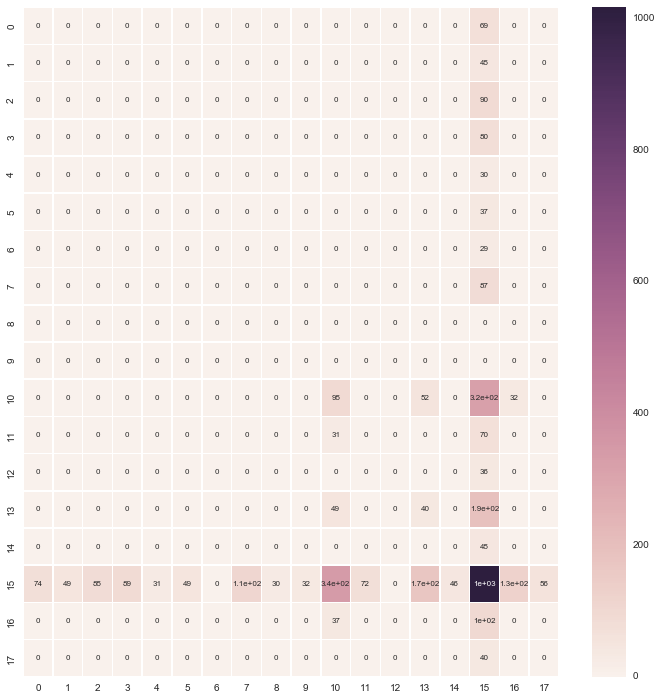

In [33]:
fig = plt.figure(figsize=(12,12))
#sns.heatmap(final_list,mask=mask, linewidths=.5, annot=True, annot_kws={"size": 8})
sns.heatmap(final_list, linewidths=.5, annot=True, annot_kws={"size": 8})
names = [i for i in htb_c_n_list]
axes = fig.ex
for ticklabel in axes.get_xticklabels():
     print (ticklabel.get_text(names.pop()) )
#plt.xlabel()

In [25]:
# fig = plt.figure()
# plt.imshow(final_list)
# plt.show()